### Vehicle Loan default Data <br>
### Goal : To predict defaulting on a Vehicle Loan by the borrower based Loan Information and historical data.<br>
### 26 Columns (7 categorical variables) 11279 rows <br>
### majority : miniority class = 8 : 2 <br>
### missing data : about 8% <br>
### Evaluation Metric: ROC -AUC <br>
### The reason for choosing ROC-AUC here, is because in this case we are predicting the loan default, which needs the reduction of both False positives and False Negatives.

<b>Results</b>

- Best Model parameters:<br>
    Best Model: <b>Cost sensitive Logistic Regression </b> <br>
    Best parameters:<b> {'class_weight': {0: 1, 1: 10}} </b><br>
    
    
- Mean Cross validation score of Best model:<br>
    <b>0.74</b>
    
- Train score of bestmodel:<br>
    <b>0.760831036650548</b>
    
- Test score of best model:<br>
   <b> 0.7524967361739767</b>

In [9]:
import pandas as pd
import numpy as np

a = pd.read_csv('train9.csv')

In [10]:
a.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,age,Employment.Type,DaysSincedisbursal,...,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,593428,48349,67269,73.73,67,17901,45,20,NaN,559,...,0,0,13000,13000,999,0,0,0,0,1
1,476510,63647,88000,73.86,248,20675,86,20,NaN,611,...,0,0,0,0,0,0,0,0,0,1
2,543222,39394,78506,52.23,11,15893,86,22,NaN,583,...,0,78398,135700,135700,40414,0,1,0,1,1
3,598616,58259,82422,71.58,11,23964,51,21,NaN,558,...,0,142036,157400,157400,63364,0,2,0,3,1
4,608894,49803,107000,47.66,248,20673,49,21,NaN,557,...,0,0,0,0,0,0,0,0,0,1


In [11]:
## changing all ID features from integer to categorical objects
a['branch_id'] = a['branch_id'].astype(object)
a['supplier_id'] = a['supplier_id'].astype(object)
a['manufacturer_id'] = a['manufacturer_id'].astype(object)
a['State_ID'] = a['State_ID'].astype(object)
a['Employee_code_ID'] = a['Employee_code_ID'].astype(object)

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11279 entries, 0 to 11278
Data columns (total 26 columns):
UniqueID                               11279 non-null int64
disbursed_amount                       11279 non-null int64
asset_cost                             11279 non-null int64
ltv                                    11279 non-null float64
branch_id                              11279 non-null object
supplier_id                            11279 non-null object
manufacturer_id                        11279 non-null object
age                                    11279 non-null int64
Employment.Type                        10316 non-null object
DaysSincedisbursal                     11279 non-null int64
State_ID                               11279 non-null object
Employee_code_ID                       11279 non-null object
PERFORM_CNS.SCORE                      11279 non-null int64
PERFORM_CNS.SCORE.DESCRIPTION          11279 non-null object
PRI.NO.OF.ACCTS                        112

In [13]:
## dropping Unique ID column
a = a.drop(['UniqueID'], axis = 1)

In [14]:
# discrete, categorical and continuous variables
discrete = [var for var in a.columns if a[var].dtype!='O' and var!='loan_default' and a[var].nunique()<11]
continuous = [var for var in a.columns if a[var].dtype!='O' and var!='loan_default' and var not in discrete]
categorical = [var for var in a.columns if a[var].dtype=='O']

In [15]:
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 2 discrete variables
There are 15 continuous variables
There are 7 categorical variables


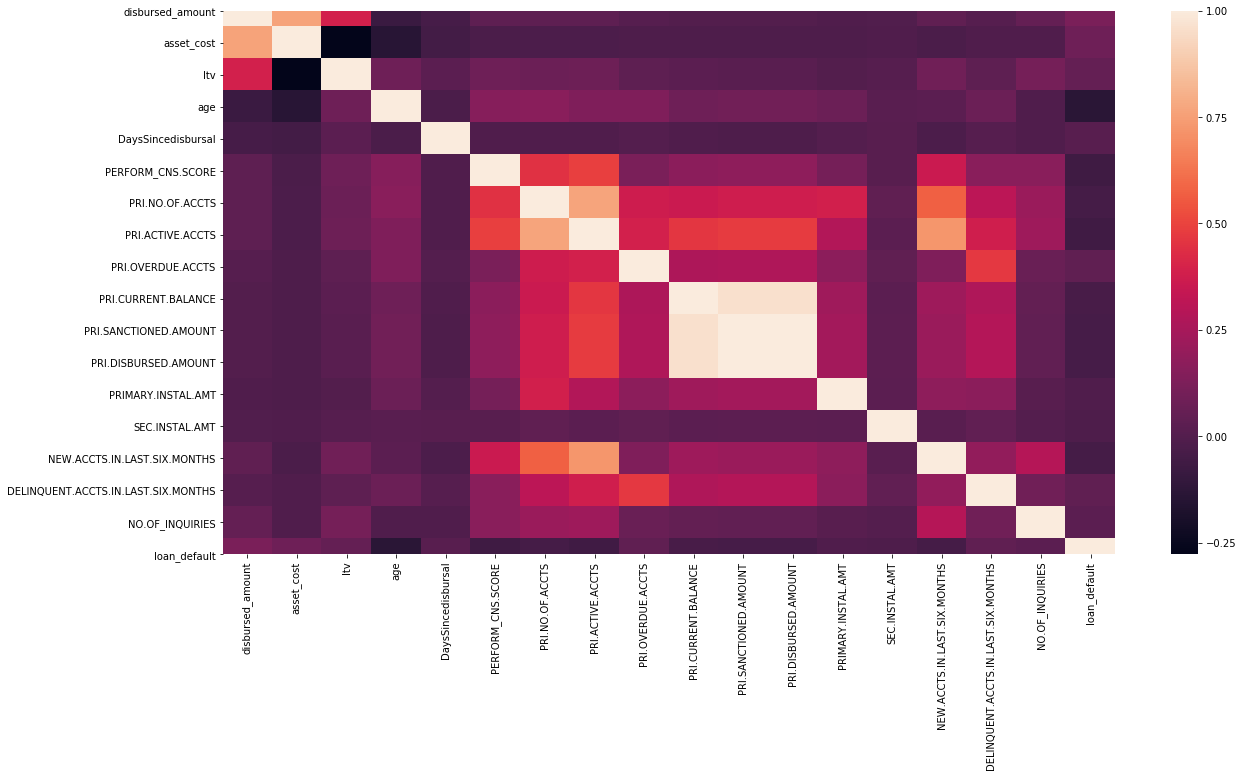

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize = (20,10))
sns.heatmap(a.corr())

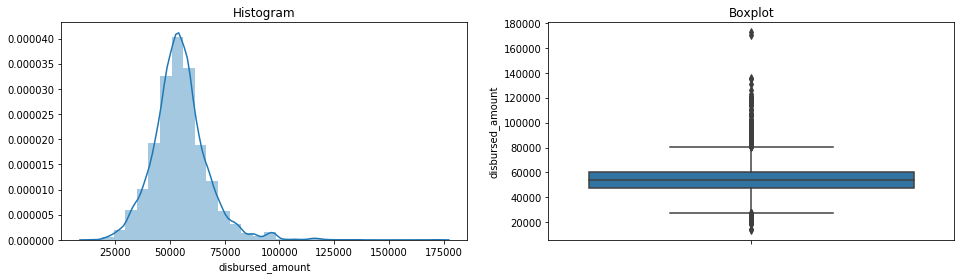

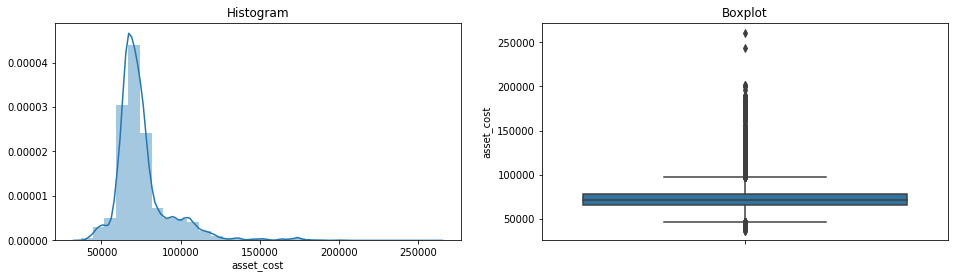

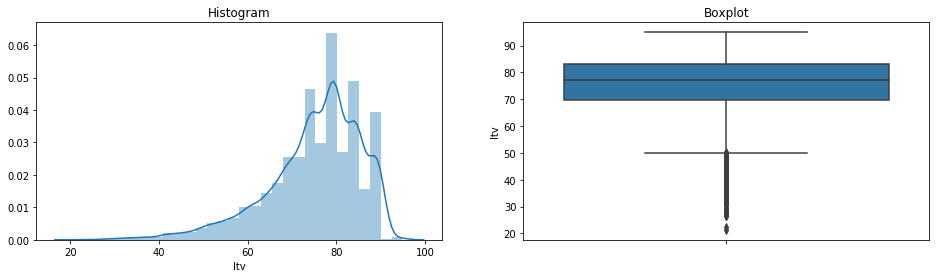

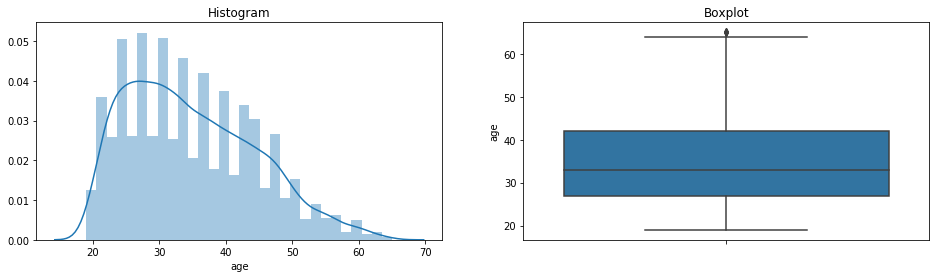

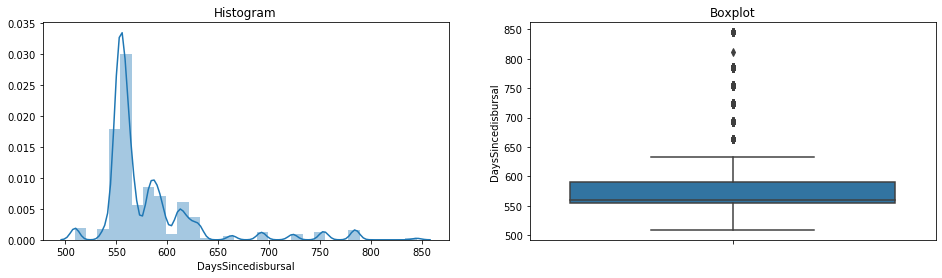

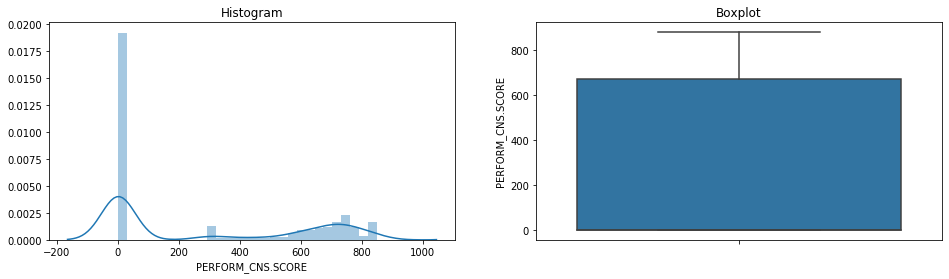

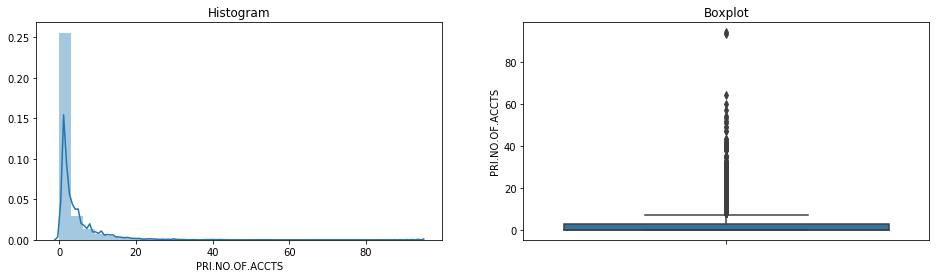

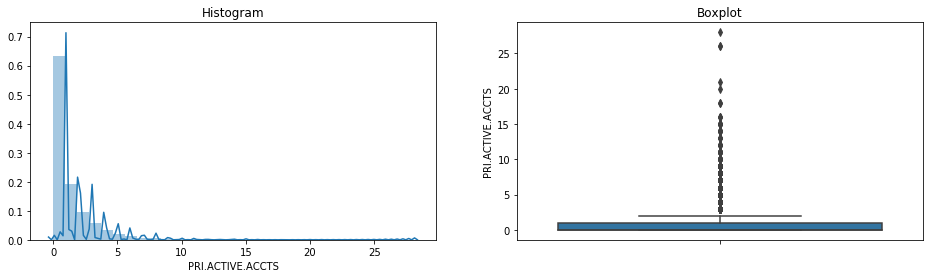

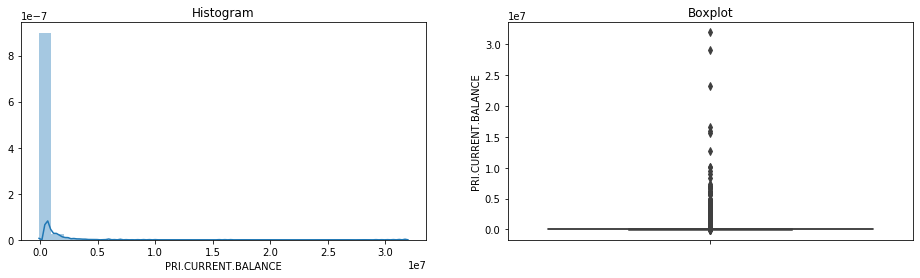

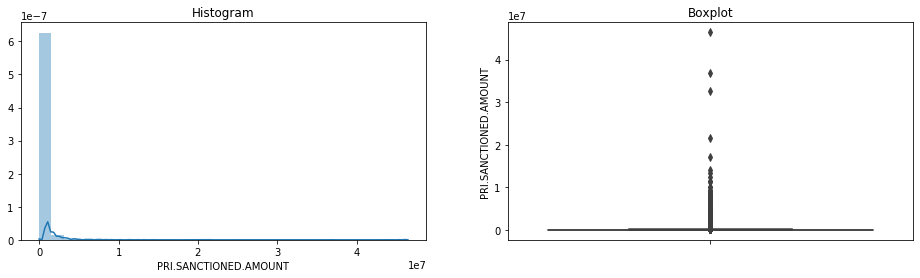

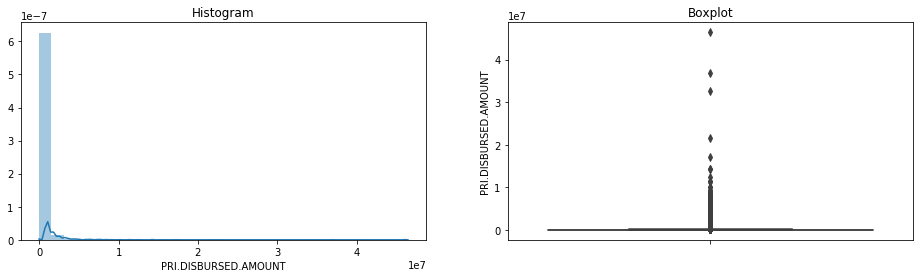

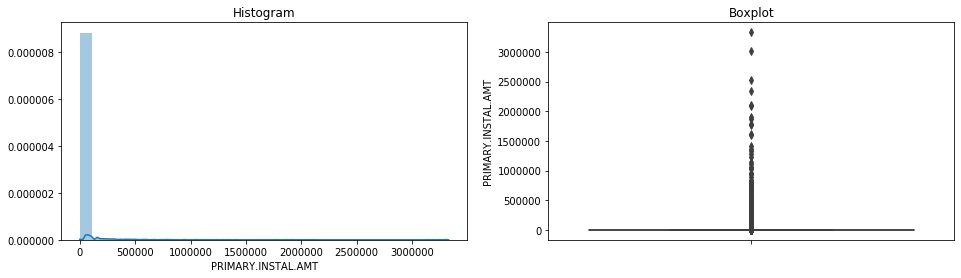

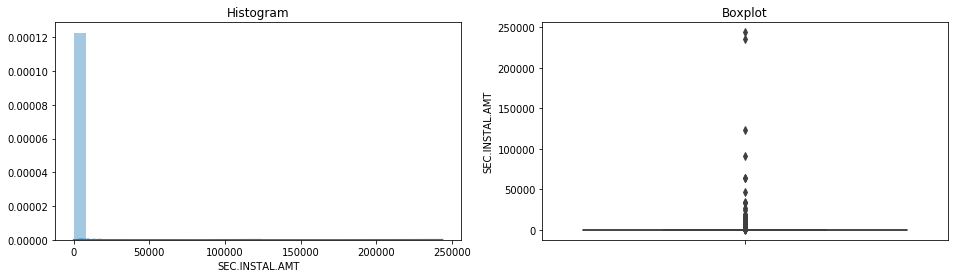

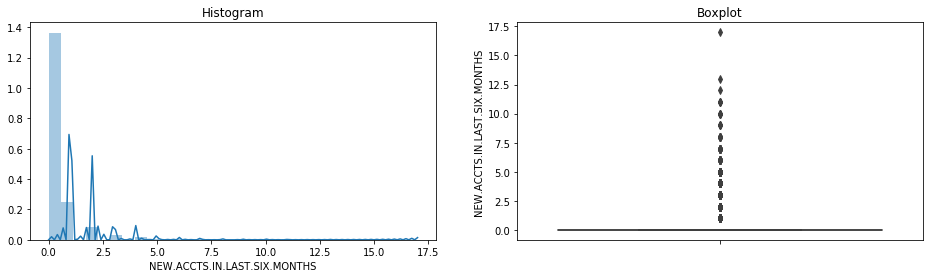

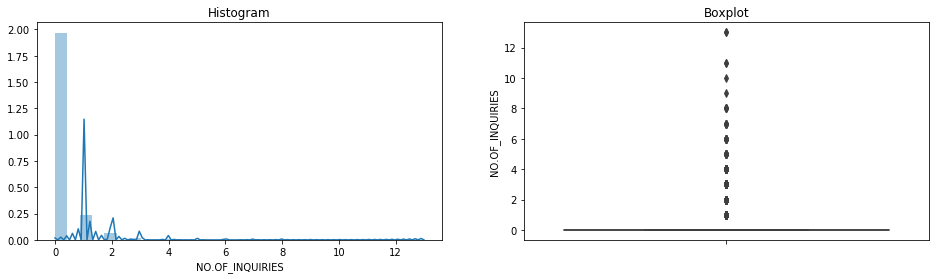

In [20]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
for var in continuous:
    diagnostic_plots(a, var)

In [18]:
a.describe()

,disbursed_amount,asset_cost,ltv,age,DaysSincedisbursal,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,1.127900e+04,1.127900e+04,1.127900e+04,1.127900e+04,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000
mean,54655.182906,75575.419363,75.125931,34.847682,579.829861,284.605018,2.364217,1.022697,0.147265,1.531311e+05,1.979198e+05,1.977273e+05,1.249733e+04,117.776044,0.391790,0.095310,0.228655,0.247185
std,12381.700104,17705.748139,10.698685,9.639551,49.824794,336.626667,4.911902,1.883704,0.500434,7.597352e+05,9.563660e+05,9.578497e+05,9.584022e+04,3708.097622,0.969827,0.379065,0.714609,0.431394
min,13814.000000,37000.000000,21.300000,19.000000,509.000000,0.000000,0.000000,0.000000,0.000000,-8.555400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47349.000000,65950.000000,69.790000,27.000000,554.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53959.000000,71282.000000,77.180000,33.000000,560.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60713.000000,78602.000000,82.945000,42.000000,590.000000,670.000000,3.000000,1.000000,0.000000,3.622350e+04,6.188050e+04,6.000000e+04,1.939500e+03,0.000000,0.000000,0.000000,0.000000,0.000000
max,172514.000000,260715.000000,94.940000,65.000000,845.000000,879.000000,94.000000,28.000000,7.000000,3.194035e+07,4.643918e+07,4.643918e+07,3.331953e+06,243760.000000,17.000000,11.000000,13.000000,1.000000


In [12]:
#creating train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    a.drop('loan_default', axis=1),
    a['loan_default'], 
    test_size=0.2, 
    random_state=0)  

In [13]:
print(X_train.shape)
print(X_test.shape)

(9023, 24)
(2256, 24)


In [14]:
# from feature-engine
from sklearn.preprocessing import MinMaxScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [15]:
Loan_pipe = Pipeline([

    # missing data imputer
      
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Employment.Type'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=categorical)),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=categorical, # we can select which variables to encode
                               drop_last=True)),
    
    # Feature Scaling
    ('scaler',MinMaxScaler()),

])

In [16]:
Loan_pipe.fit(X_train, y_train)
X_train=Loan_pipe.transform(X_train)
X_test=Loan_pipe.transform(X_test)

## Basic Algorithm

## 1) Naive Algorithm

In [17]:
## Naive algorithm
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.5011826808596183

Naive Algorithm Test Performance:  0.6334219858156028


In [18]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter = 100000).fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))


Mean Cross-validation scores: 0.7358948237687578

Logistic.coef_: [[ 1.12267445e+00  6.60154038e-01  1.52318833e+00 -2.99867377e-01
  -3.40526558e-01  4.17915352e-01 -1.25100233e+00 -1.70654687e+00
   9.77870978e-01 -8.81534329e-01 -8.30499250e-01 -8.13786989e-01
  -3.88516687e-01 -4.34402715e-01 -3.46998444e-01  1.67270614e+00
   1.58472607e+00 -1.29538000e+00  2.04833417e-01  2.09323969e-01
   7.03673822e-01  6.55452949e-02 -3.33906652e-01 -3.19471282e-01
  -4.83390482e-01  1.82019225e-01  5.88259586e-01 -9.33473245e-02
   9.52107540e-01 -3.93069244e-02 -7.31259046e-01  5.45607596e-02
   2.17406413e-02  9.63534440e-02  4.12258398e-01  1.14768427e-01
   3.36981963e-01 -4.49069917e-01 -2.44753010e-02  3.10777797e-02
   3.83720358e-01 -5.06278513e-01 -4.07660268e-01  1.17345524e-01
   4.18077102e-01 -7.47251192e-01 -5.96635229e-01 -3.77770432e-02
   2.53072008e-01  2.83756766e-01 -5.00491219e-01 -1.55170677e-01
  -7.43792536e-01 -3.96272160e-01  5.28122496e-01 -1.42581386e+00
   7.61355

In [19]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,7)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring = 'roc_auc')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.67

Decision Tree parameters:  {'max_depth': 5}
Decision Tree Train Performance:  0.697354427005276
Decision Tree Test Performance:  0.652673433856064


In [20]:
#knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,10)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring='roc_auc')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.68

KNN parameters:  {'n_neighbors': 9}
KNN Test Performance:  0.695206867981737


In [21]:
#SVM
from sklearn import svm

supvm = svm.SVC(random_state=0)

C = [0.1, 1, 10]

param_svm = [
              {'kernel': ['linear'],
               'C': C}]

grid_svm = GridSearchCV(supvm, param_svm, cv=5,
                          return_train_score=True,scoring = 'roc_auc')
grid_svm.fit(X_train, y_train)
print('train score: ', grid_svm.score(X_train, y_train))
print('test score: ', grid_svm.score(X_train, y_train))
print("Best parameters: {}".format(grid_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svm.best_score_))

train score:  0.6444233049420015
test score:  0.6444233049420015
Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.65


In [22]:
#random forest
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring = 'roc_auc')
grid_rf.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_rf.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_rf.best_params_}')
print(f'Train score is {grid_rf.score(X_train,y_train)}')
print(f'Test score is {grid_rf.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.71229903109098
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
Train score is 0.7749919096641051
Test score is 0.7083617200648306


In [23]:
#Extra tree
from sklearn.ensemble import ExtraTreesClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)


etc= ExtraTreesClassifier()
etc_param = { 
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,7, 8],
    'criterion' :['gini', 'entropy']
}
grid_et = GridSearchCV(etc, etc_param,cv=3, return_train_score=True,scoring = 'roc_auc' )
grid_et.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_et.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_et.best_params_}')
print(f'Train score is {grid_et.score(X_train,y_train)}')
print(f'Test score is {grid_et.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7175553116497522
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Train score is 0.7923234980490353
Test score is 0.7136527994242808


In [24]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
grid_gd = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
grid_gd.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_gd.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_gd.best_params_}')
print(f'Train score is {grid_gd.score(X_train,y_train)}')
print(f'Test score is {grid_gd.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7051647222101401
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Train score is 0.982860656563915
Test score is 0.7017417787359271


In [25]:
#xgboost
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.1,0.5,0.8],
               'min_child_weight' : [1,3,5],
                'subsample':[0.6,0.8,1]
             }
grid_xgb = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
grid_xgb.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_xgb.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_xgb.best_params_}')
print(f'Train score is {grid_xgb.score(X_train,y_train)}')
print(f'Test score is {grid_xgb.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7397398673286117
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Train score is 0.8394268925417714
Test score is 0.7443213575027557


In [26]:
# Stacking Classifier
estimators_ = [('dtree',grid_dtree.best_estimator_),
            ('rf',grid_rf.best_estimator_),('gd',grid_gd.best_estimator_),
            ('et',grid_et.best_estimator_),('xgb',grid_xgb.best_estimator_)]

from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.739946683577333
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9118853665717932
Test score is 0.7472061752936405


## Cost sensitive Algorithm

In [27]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs', max_iter = 100000), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))
print(f'Train score is {cgrid_logreg.score(X_train,y_train)}')
print(f'Test score is {cgrid_logreg.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.74
Train score is 0.760831036650548
Test score is 0.7524967361739767


In [28]:
#svc
param_grid = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_svc= GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))
print(f'Train score is {cgrid_svc.score(X_train,y_train)}')
print(f'Test score is {cgrid_svc.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.71
Train score is 0.8796947821312332
Test score is 0.7258500205836208


In [29]:
#decison tree
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.60


In [30]:
#xgb
param_grid = { 
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.72


In [31]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC-AUC: %.3f' % scores.mean())

Mean ROC-AUC: 0.715


In [32]:
#extratrees
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC-AUC: %.3f' % scores.mean())

Mean ROC-AUC: 0.708


In [33]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC-AUC: %.3f' % scores.mean())

Mean ROC-AUC: 0.672


## Data Sampling Algorithms

In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.65


In [42]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression(max_iter = 100000))])
param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))
print(f'Train score is {ogrid_lg.score(X_train,y_train)}')
print(f'Test score is {ogrid_lg.score(X_test,y_test)}')

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.74
Train score is 0.7573915165533578
Test score is 0.7439791612874458


In [36]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.67


In [37]:
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',svm.SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))

C:\Users\Pk254\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.71


In [38]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5],
                'rf__max_depth' : [4,5]}

ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rf.best_score_))

Best parameters: {'rf__max_depth': 5, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.70


In [39]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))

Best parameters: {'smote__k_neighbors': 3, 'xgb__learning_rate': 0.1}
Best Mean cross-validation score: 0.72


In [40]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.70


In [41]:
#top 5 estimators
estimators_ = [('dtree',ogrid_dtree.best_estimator_),
            ('rf',grid_rf.best_estimator_),('gd',grid_svm.best_estimator_),
            ('et',grid_knn.best_estimator_),('xgb',ogrid_xgb.best_estimator_)]

from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7311679348071135
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.8465354794386102
Test score is 0.7428748007744004
